### Collecting Training Data
In order to start collecting training data, you'll need to do the following:

* Enter Training Mode in the simulator.
* Start driving the car to get a feel for the controls.
* When you are ready, hit the record button in the top right to start recording.
* Continue driving for a few laps or till you feel like you have enough data.
* Hit the record button in the top right again to stop recording.

### Strategies for Collecting Data
Now that you have driven the simulator and know how to record data, it's time to think about collecting data that will ensure a successful model. There are a few general concepts to think about that we will later discuss in more detail:

* the car should stay in the center of the road as much as possible
* if the car veers off to the side, it should recover back to center
* driving counter-clockwise can help the model generalize
* flipping the images is a quick way to augment the data
* collecting data from the second track can also help generalize the model
* we want to avoid overfitting or underfitting when training the model
* knowing when to stop collecting more data




pip install --upgrade --ignore-installed setuptools

pip install python-socketio

python drive.py model.h5

python drive.py model.h5 run1

python video.py run1

python video.py run1 --fps 48


In [11]:
import csv
import cv2
import numpy as np
import os
from math import ceil 

from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Conv2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.models import Model
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


samples=[]
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)
        
        
'''
images = []
measurements = []
for line in lines:
    for i in range(3):#center,left,right
        source_path = line[i]
#         filename = source_path.split('/')[-1]
        filename = source_path.split('\\')[-1]
        current_path = './data/IMG/'+filename
        if(os.path.exists(current_path)):
            image = cv2.imread(current_path)
            images.append(image)
            measurement = float(line[3])
            measurements.append(measurement)
'''

'''
#Data augmentation        
augmented_images, augmented_measurements = [],[]
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image, 1))
    augmented_measurements.append(measurement*-1.0)


X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)
'''

########################################################################
#Model Architecture
########################################################################
#Use Keras to train a network to do the following:
#1.Take in an image from the center camera of the car. This is the input to your neural network.
#2.Output a new steering angle for the car. 

model = Sequential()
#Set up lambda layer
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160, 320, 3)))
#Cropping2D Layer
model.add(Cropping2D(cropping=((70,25),(0,0))))
# model.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(160,320,3)))

model.add(Conv2D(24, (5, 5), strides=(2, 2), activation="relu"))
model.add(Conv2D(36, (5,5), strides=(2,2), activation="relu"))
model.add(Conv2D(48, (5,5), strides=(2,2), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

#LeNet
# model.add(Convolution2D(6, 5, 5, activation="relu"))
# model.add(MaxPooling2D())
# model.add(Convolution2D(6, 5, 5, activation="relu"))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(120))
# model.add(Dense(84))
# model.add(Dense(1))

########################################################################
#Data augmentation        
########################################################################
def data_augment(images, measurements):
    augmented_images, augmented_measurements = [],[]
    for image, measurement in zip(images, measurements):
        augmented_images.append(image)
        augmented_measurements.append(measurement)
        augmented_images.append(cv2.flip(image, 1))
        augmented_measurements.append(measurement*-1.0)

    return augmented_images,augmented_measurements

########################################################################
#Generator
########################################################################
def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            for batch_sample in batch_samples:
                for i in range(3):#center,left,right
                    source_path = line[i]
            #         filename = source_path.split('/')[-1]
                    filename = source_path.split('\\')[-1]
                    current_path = './data/IMG/'+filename
                    if(os.path.exists(current_path)):
                        image = cv2.imread(current_path)
                        images.append(image)
                        measurement = float(line[3])
                        angles.append(measurement)
            
            augmented_images, augmented_measurements = data_augment(images, angles)
            X_train = np.array(augmented_images)
            y_train = np.array(augmented_measurements)
            yield sklearn.utils.shuffle(X_train, y_train)
            
            
########################################################################
########################################################################
train_samples, validation_samples = train_test_split(samples, test_size=0.2)

batch_size = 32

#Compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=batch_size)
validation_generator = generator(validation_samples, batch_size=batch_size)          
          
model.compile(loss='mse', optimizer='adam')
# model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=5)
history_object = model.fit_generator(train_generator, 
                                     steps_per_epoch=ceil(len(train_samples)/batch_size),
                                     validation_data=validation_generator, 
                                     validation_steps=ceil(len(validation_samples)/batch_size), 
                                     epochs=5, verbose=1)



model.save("model.h5")
          
          
          

Epoch 1/5
18/18 [==============================] - 25s 1s/step - loss: 5.2440e-04 - val_loss: 2.5806e-05
Epoch 2/5
18/18 [==============================] - 23s 1s/step - loss: 6.5757e-06 - val_loss: 1.5372e-07
Epoch 3/5
18/18 [==============================] - 25s 1s/step - loss: 8.4748e-07 - val_loss: 5.7499e-07
Epoch 4/5
18/18 [==============================] - 27s 1s/step - loss: 1.5849e-07 - val_loss: 2.1729e-08
Epoch 5/5
18/18 [==============================] - 30s 2s/step - loss: 2.3759e-08 - val_loss: 4.0751e-09


dict_keys(['val_loss', 'loss'])


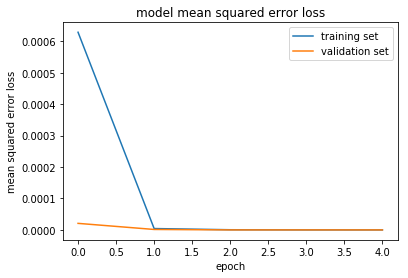

In [10]:
# history_object = model.fit_generator(train_generator, samples_per_epoch =
#     len(train_samples), validation_data = 
#     validation_generator,
#     nb_val_samples = len(validation_samples), 
#     nb_epoch=5, verbose=1)

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

## More Data Collection
Here are some general guidelines for data collection:

* two or three laps of center lane driving
* one lap of recovery driving from the sides
* one lap focusing on driving smoothly around curves



